In [1]:
import pandas as pd
from darts import TimeSeries

ModuleNotFoundError: No module named 'darts'

In [2]:
from darts.models import AutoARIMA

In [3]:
import pandas as pd
from pandas import Series
from pandas.tseries.offsets import DateOffset
import numpy as np
import scipy
from scipy import stats
import scipy.stats as scs
import itertools
from scipy.special import boxcox, inv_boxcox

In [4]:
import statsmodels
import statsmodels.api as sm
import statsmodels.stats as sms
from statsmodels.stats.stattools import jarque_bera
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics import tsaplots
import pmdarima as pm

In [5]:
from datetime import datetime, timedelta, date

In [6]:
import prophet
from prophet import Prophet

In [7]:
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)


import pandas as pd
from pandas import Series
from pandas.tseries.offsets import DateOffset
import numpy as np
import scipy
from scipy import stats
import scipy.stats as scs
import itertools
from scipy.special import boxcox, inv_boxcox


import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Data Source
import yfinance as yf

# Stats models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats as sms
from statsmodels.stats.stattools import jarque_bera
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics import tsaplots
import pmdarima as pm

# Date tools
from datetime import datetime, timedelta, date

# Prophet model
import prophet
from prophet import Prophet

# Imports for model metrics and performance
import math
from math import sqrt 
import sklearn
from sklearn.metrics import mean_squared_error
import plotly as py
import plotly.express as px
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.preprocessing import MinMaxScaler

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
import re

In [10]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

In [11]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
plt.rcParams["figure.figsize"] = (14,6)
plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'

In [253]:
data_path = ("../raw_data/data_daily.csv")
data = pd.read_csv(data_path)
data["timestamp"] = pd.to_datetime(data['timestamp'])

data.drop_duplicates(subset='timestamp', inplace=True)

data.head()

,timestamp,open,high,low,close,volume,volume_CMF,volume_FII,volume_MFI,volume_VWA,mom_AOI,mom_PPO,mom_PPO_signal,mom_PVO,mom_PVO_signal,mom_ROC,mom_rsi,mom_stoch_RSI,mom_StochOscillator,mom_StochOscillator_signal,mom_TSI,mom_UltimateOscillator,mom_WilliamsRIndicator,volat_ATR,volat_bol_hband_binary,volat_bol_lband_binary,volat_bol_band_width,KCW,KCP,donch_DCW,ULI,ADX,ADX_neg,ADX_pos,ARI_down,ARI,ARI_up,CCI,DPO,EMA_100_binary,KST,KST_diff,KST_sig,MACD_line,MACD_signal,MAI,PSAR_binary,STC,TRIX,vortex_ind_diff,vortex_neg,vortex_pos,S&P_close_filled,Interest_Rates_filled,Inflation_Rate_us,subhag_signal,Fisher,Fisher_trigger,supertrend,chop_index,Velocity
0,2019-09-12,10099.78,10184.66,10081.81,10161.51,621.690,0.008019,9381.841629,54.999476,10062.211552,-8.198794,-0.116362,-0.288550,16.431891,9.311687,1.452269,57.987654,1.000000,90.760327,83.238267,-5.246409,52.701871,-9.239673,80.236309,1.0,0.0,1.607514,1.558032,1.168745,2.489067,0.729341,13.991682,17.547411,26.026556,76.0,24.0,100.0,181.949135,37.5275,0,-9.504205,4.577703,-14.081908,-11.741233,-29.133452,25.679280,1,98.265595,-0.046155,0.183679,0.900498,1.084177,3009.57,2.25,1.7,1,1.05901,0.58994,1,55.107287,-1
1,2019-09-13,10321.45,10400.00,10321.45,10388.87,655.809,0.095988,11734.867436,77.615349,10259.840800,159.304471,0.608617,0.468596,4.272041,5.684204,2.640083,70.369326,0.868380,96.554713,88.218528,28.186883,53.604233,-3.445287,67.796245,0.0,0.0,4.120070,1.230895,1.938013,2.230950,0.321799,27.225902,11.870076,32.964564,40.0,60.0,100.0,112.401856,-56.9245,1,19.737246,6.358419,13.378827,62.202615,47.771729,24.292162,1,99.984201,0.069384,0.575479,0.686524,1.262003,3007.39,2.25,1.7,-1,2.53919,2.24085,1,42.784133,1
2,2019-09-14,10254.01,10299.66,10231.31,10287.11,681.268,0.033290,979.983540,41.709476,10275.093802,-76.575235,-0.047843,0.044734,2.761658,5.839311,-0.187456,51.924402,0.776736,70.134915,45.981215,-2.620863,58.261506,-29.865085,61.373709,0.0,0.0,1.566792,1.102287,0.477146,1.854662,0.945806,22.265541,20.256346,18.970713,92.0,-80.0,12.0,-37.651195,-17.6625,1,0.444923,-4.194756,4.639679,-4.915877,4.601034,24.405506,1,0.000381,0.007842,-0.039844,0.995906,0.956061,3007.39,2.25,1.7,1,-1.52562,-1.92668,1,56.123524,-1
3,2019-09-15,10395.04,10419.97,10317.39,10377.71,1011.804,0.090962,4476.915550,46.417427,10338.125632,69.057147,0.244907,0.178765,3.620128,4.110448,0.700987,60.161971,0.765572,78.569980,85.801171,18.337634,61.533868,-21.430020,52.754102,0.0,0.0,1.552809,0.903583,1.091146,1.904409,0.272558,17.831905,18.380853,21.759678,64.0,32.0,96.0,98.433260,-17.6275,1,5.356089,3.119255,2.236834,25.294393,18.444913,24.432979,1,99.857559,0.023631,0.171927,0.875705,1.047632,3007.39,2.25,1.7,-1,2.34801,2.39448,1,49.875268,1
4,2019-09-16,10271.19,10304.56,10266.13,10289.03,834.126,0.021198,-752.692873,34.979972,10292.117754,-19.298147,-0.082579,-0.067507,0.362793,1.060619,0.033737,46.724133,0.654263,45.748786,39.910370,-7.941591,50.045302,-54.251214,43.731726,0.0,0.0,0.578982,0.689130,0.380905,0.780561,0.519789,39.609535,26.743730,11.020501,96.0,-92.0,4.0,-74.176329,11.9175,1,-3.065092,-0.524449,-2.540643,-8.507406,-6.956787,24.071955,1,0.000021,-0.010739,-0.071409,1.018981,0.947572,2997.96,2.25,1.7,-1,0.00179,0.18466,1,70.808813,-1


In [14]:
data.info()

In [15]:
data.isnull().sum().sum()

0

In [16]:
#data=data.dropna()

In [17]:
data.duplicated().sum()

0

In [18]:
#data = data.drop_duplicates()

In [19]:
#had to remove duplicates
#series = TimeSeries.from_dataframe(data,"timestamp", "close", freq='H')

# TRAIN SPLIT

In [20]:
#train_size = 0.7
#index = round(train_size*data.shape[0])

#data_train = data.iloc[:index]
#data_test = data.iloc[index:]

In [21]:
#data_train.shape

In [22]:
#data_test.shape

In [23]:
#y_train=data_train[['timestamp', 'close']]
#X_train=data_train.drop(columns=['timestamp', 'close'])
#X_train

In [24]:
#y_train

In [25]:
#y_test=data_test[['timestamp', 'close']]
#X_test=data_test.drop(columns=['timestamp', 'close'])
#X_test

In [26]:
#y_test

# ETS(baseline)

In [27]:
from darts.models import ExponentialSmoothing

In [28]:
data

,timestamp,open,high,low,close,volume,volume_CMF,volume_FII,volume_MFI,volume_VWA,mom_AOI,mom_PPO,mom_PPO_signal,mom_PVO,mom_PVO_signal,mom_ROC,mom_rsi,mom_stoch_RSI,mom_StochOscillator,mom_StochOscillator_signal,mom_TSI,mom_UltimateOscillator,mom_WilliamsRIndicator,volat_ATR,volat_bol_hband_binary,volat_bol_lband_binary,volat_bol_band_width,KCW,KCP,donch_DCW,ULI,ADX,ADX_neg,ADX_pos,ARI_down,ARI,ARI_up,CCI,DPO,EMA_100_binary,KST,KST_diff,KST_sig,MACD_line,MACD_signal,MAI,PSAR_binary,STC,TRIX,vortex_ind_diff,vortex_neg,vortex_pos,S&P_close_filled,Interest_Rates_filled,Inflation_Rate_us,subhag_signal,Fisher,Fisher_trigger,supertrend,chop_index,Velocity
0,2019-09-12,10099.78,10184.66,10081.81,10161.51,621.690,0.008019,9381.841629,54.999476,10062.211552,-8.198794,-0.116362,-0.288550,16.431891,9.311687,1.452269,57.987654,1.000000,90.760327,83.238267,-5.246409,52.701871,-9.239673,80.236309,1.0,0.0,1.607514,1.558032,1.168745,2.489067,0.729341,13.991682,17.547411,26.026556,76.0,24.0,100.0,181.949135,37.5275,0,-9.504205,4.577703,-14.081908,-11.741233,-29.133452,25.679280,1,98.265595,-0.046155,0.183679,0.900498,1.084177,3009.57,2.25,1.70,1,1.05901,0.58994,1,55.107287,-1
1,2019-09-13,10321.45,10400.00,10321.45,10388.87,655.809,0.095988,11734.867436,77.615349,10259.840800,159.304471,0.608617,0.468596,4.272041,5.684204,2.640083,70.369326,0.868380,96.554713,88.218528,28.186883,53.604233,-3.445287,67.796245,0.0,0.0,4.120070,1.230895,1.938013,2.230950,0.321799,27.225902,11.870076,32.964564,40.0,60.0,100.0,112.401856,-56.9245,1,19.737246,6.358419,13.378827,62.202615,47.771729,24.292162,1,99.984201,0.069384,0.575479,0.686524,1.262003,3007.39,2.25,1.70,-1,2.53919,2.24085,1,42.784133,1
2,2019-09-14,10254.01,10299.66,10231.31,10287.11,681.268,0.033290,979.983540,41.709476,10275.093802,-76.575235,-0.047843,0.044734,2.761658,5.839311,-0.187456,51.924402,0.776736,70.134915,45.981215,-2.620863,58.261506,-29.865085,61.373709,0.0,0.0,1.566792,1.102287,0.477146,1.854662,0.945806,22.265541,20.256346,18.970713,92.0,-80.0,12.0,-37.651195,-17.6625,1,0.444923,-4.194756,4.639679,-4.915877,4.601034,24.405506,1,0.000381,0.007842,-0.039844,0.995906,0.956061,3007.39,2.25,1.70,1,-1.52562,-1.92668,1,56.123524,-1
3,2019-09-15,10395.04,10419.97,10317.39,10377.71,1011.804,0.090962,4476.915550,46.417427,10338.125632,69.057147,0.244907,0.178765,3.620128,4.110448,0.700987,60.161971,0.765572,78.569980,85.801171,18.337634,61.533868,-21.430020,52.754102,0.0,0.0,1.552809,0.903583,1.091146,1.904409,0.272558,17.831905,18.380853,21.759678,64.0,32.0,96.0,98.433260,-17.6275,1,5.356089,3.119255,2.236834,25.294393,18.444913,24.432979,1,99.857559,0.023631,0.171927,0.875705,1.047632,3007.39,2.25,1.70,-1,2.34801,2.39448,1,49.875268,1
4,2019-09-16,10271.19,10304.56,10266.13,10289.03,834.126,0.021198,-752.692873,34.979972,10292.117754,-19.298147,-0.082579,-0.067507,0.362793,1.060619,0.033737,46.724133,0.654263,45.748786,39.910370,-7.941591,50.045302,-54.251214,43.731726,0.0,0.0,0.578982,0.689130,0.380905,0.780561,0.519789,39.609535,26.743730,11.020501,96.0,-92.0,4.0,-74.176329,11.9175,1,-3.065092,-0.524449,-2.540643,-8.507406,-6.956787,24.071955,1,0.000021,-0.010739,-0.071409,1.018981,0.947572,2997.96,2.25,1.70,-1,0.00179,0.18466,1,70.808813,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,2023-05-31,27745.70,27832.70,27637.40,27710.10,10281.328,-0.115085,-255844.295704,37.428422,27785.137663,-4.049412,0.001926,0.034655,-5.320770,1.433885,-0.466595,47.666722,0.236410,35.410932,46.021759,0.078157,52.449216,-64.589068,154.142202,0.0,0.0,1.255117,1.083264,0.274102,1.748186,0.845608,12.254840,20.165743,15.941349,72.0,-12.0,60.0,-53.584863,113.2100,1,-1.624776,-0.828185,-0.796592,0.534585,9.619334,25.037448,0,0.813456,0.002611,-0.035737,1.002756,0.967019,4179.83,5.25,5.15,1,-0.40399,-0.580

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362 entries, 0 to 1361
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   timestamp                   1362 non-null   datetime64[ns]
 1   open                        1362 non-null   float64       
 2   high                        1362 non-null   float64       
 3   low                         1362 non-null   float64       
 4   close                       1362 non-null   float64       
 5   volume                      1362 non-null   float64       
 6   volume_CMF                  1362 non-null   float64       
 7   volume_FII                  1362 non-null   float64       
 8   volume_MFI                  1362 non-null   float64       
 9   volume_VWA                  1362 non-null   float64       
 10  mom_AOI                     1362 non-null   float64       
 11  mom_PPO                     1362 non-null   float64     

In [30]:
#data.reset_index(inplace=True)

In [31]:
data

,timestamp,open,high,low,close,volume,volume_CMF,volume_FII,volume_MFI,volume_VWA,mom_AOI,mom_PPO,mom_PPO_signal,mom_PVO,mom_PVO_signal,mom_ROC,mom_rsi,mom_stoch_RSI,mom_StochOscillator,mom_StochOscillator_signal,mom_TSI,mom_UltimateOscillator,mom_WilliamsRIndicator,volat_ATR,volat_bol_hband_binary,volat_bol_lband_binary,volat_bol_band_width,KCW,KCP,donch_DCW,ULI,ADX,ADX_neg,ADX_pos,ARI_down,ARI,ARI_up,CCI,DPO,EMA_100_binary,KST,KST_diff,KST_sig,MACD_line,MACD_signal,MAI,PSAR_binary,STC,TRIX,vortex_ind_diff,vortex_neg,vortex_pos,S&P_close_filled,Interest_Rates_filled,Inflation_Rate_us,subhag_signal,Fisher,Fisher_trigger,supertrend,chop_index,Velocity
0,2019-09-12,10099.78,10184.66,10081.81,10161.51,621.690,0.008019,9381.841629,54.999476,10062.211552,-8.198794,-0.116362,-0.288550,16.431891,9.311687,1.452269,57.987654,1.000000,90.760327,83.238267,-5.246409,52.701871,-9.239673,80.236309,1.0,0.0,1.607514,1.558032,1.168745,2.489067,0.729341,13.991682,17.547411,26.026556,76.0,24.0,100.0,181.949135,37.5275,0,-9.504205,4.577703,-14.081908,-11.741233,-29.133452,25.679280,1,98.265595,-0.046155,0.183679,0.900498,1.084177,3009.57,2.25,1.70,1,1.05901,0.58994,1,55.107287,-1
1,2019-09-13,10321.45,10400.00,10321.45,10388.87,655.809,0.095988,11734.867436,77.615349,10259.840800,159.304471,0.608617,0.468596,4.272041,5.684204,2.640083,70.369326,0.868380,96.554713,88.218528,28.186883,53.604233,-3.445287,67.796245,0.0,0.0,4.120070,1.230895,1.938013,2.230950,0.321799,27.225902,11.870076,32.964564,40.0,60.0,100.0,112.401856,-56.9245,1,19.737246,6.358419,13.378827,62.202615,47.771729,24.292162,1,99.984201,0.069384,0.575479,0.686524,1.262003,3007.39,2.25,1.70,-1,2.53919,2.24085,1,42.784133,1
2,2019-09-14,10254.01,10299.66,10231.31,10287.11,681.268,0.033290,979.983540,41.709476,10275.093802,-76.575235,-0.047843,0.044734,2.761658,5.839311,-0.187456,51.924402,0.776736,70.134915,45.981215,-2.620863,58.261506,-29.865085,61.373709,0.0,0.0,1.566792,1.102287,0.477146,1.854662,0.945806,22.265541,20.256346,18.970713,92.0,-80.0,12.0,-37.651195,-17.6625,1,0.444923,-4.194756,4.639679,-4.915877,4.601034,24.405506,1,0.000381,0.007842,-0.039844,0.995906,0.956061,3007.39,2.25,1.70,1,-1.52562,-1.92668,1,56.123524,-1
3,2019-09-15,10395.04,10419.97,10317.39,10377.71,1011.804,0.090962,4476.915550,46.417427,10338.125632,69.057147,0.244907,0.178765,3.620128,4.110448,0.700987,60.161971,0.765572,78.569980,85.801171,18.337634,61.533868,-21.430020,52.754102,0.0,0.0,1.552809,0.903583,1.091146,1.904409,0.272558,17.831905,18.380853,21.759678,64.0,32.0,96.0,98.433260,-17.6275,1,5.356089,3.119255,2.236834,25.294393,18.444913,24.432979,1,99.857559,0.023631,0.171927,0.875705,1.047632,3007.39,2.25,1.70,-1,2.34801,2.39448,1,49.875268,1
4,2019-09-16,10271.19,10304.56,10266.13,10289.03,834.126,0.021198,-752.692873,34.979972,10292.117754,-19.298147,-0.082579,-0.067507,0.362793,1.060619,0.033737,46.724133,0.654263,45.748786,39.910370,-7.941591,50.045302,-54.251214,43.731726,0.0,0.0,0.578982,0.689130,0.380905,0.780561,0.519789,39.609535,26.743730,11.020501,96.0,-92.0,4.0,-74.176329,11.9175,1,-3.065092,-0.524449,-2.540643,-8.507406,-6.956787,24.071955,1,0.000021,-0.010739,-0.071409,1.018981,0.947572,2997.96,2.25,1.70,-1,0.00179,0.18466,1,70.808813,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,2023-05-31,27745.70,27832.70,27637.40,27710.10,10281.328,-0.115085,-255844.295704,37.428422,27785.137663,-4.049412,0.001926,0.034655,-5.320770,1.433885,-0.466595,47.666722,0.236410,35.410932,46.021759,0.078157,52.449216,-64.589068,154.142202,0.0,0.0,1.255117,1.083264,0.274102,1.748186,0.845608,12.254840,20.165743,15.941349,72.0,-12.0,60.0,-53.584863,113.2100,1,-1.624776,-0.828185,-0.796592,0.534585,9.619334,25.037448,0,0.813456,0.002611,-0.035737,1.002756,0.967019,4179.83,5.25,5.15,1,-0.40399,-0.580

In [32]:
data['log_close'] = np.log(data['close'])

In [33]:
log_close = data['log_close']

In [34]:
series = TimeSeries.from_dataframe(data, 'timestamp', "close",freq='1D')

In [35]:
train_ets, val_ets = series.split_before(pd.Timestamp('2023-01-01 00:00:00'))

In [36]:
train_ets

<TimeSeries (DataArray) (timestamp: 1207, component: 1, sample: 1)>
array([[[10161.51]],

       [[10388.87]],

       [[10287.11]],

       ...,

       [[16520.9 ]],

       [[16590.9 ]],

       [[16578.9 ]]])
Coordinates:
  * timestamp  (timestamp) datetime64[ns] 2019-09-12 2019-09-13 ... 2022-12-31
  * component  (component) object 'close'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [37]:
data['timestamp'].duplicated().sum()

0

In [38]:
model_ESP = ExponentialSmoothing()
model_ESP.fit(train_ets)
prediction = model_ESP.predict(1)#, num_samples=1000)

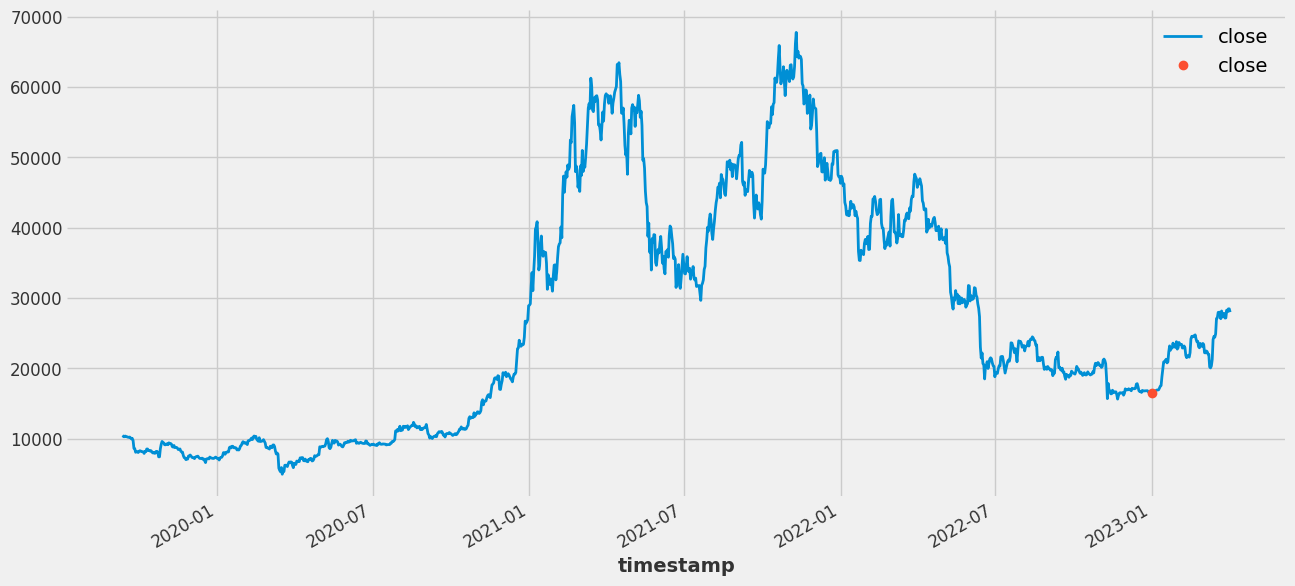

In [39]:
series[:1300].plot()
prediction.plot()

In [40]:
len(train_ets)

1207

In [41]:
prediction = model_ESP.predict(len(val_ets))

In [42]:
from darts.ad import KMeansScorer

scorer = KMeansScorer(k=2, window=5)
scorer.fit(train_ets)
anom_score = scorer.score(val_ets)

In [43]:
from darts.ad import QuantileDetector

detector = QuantileDetector(high_quantile=0.99)
detector.fit(scorer.score(train_ets))
binary_anom = detector.detect(anom_score)

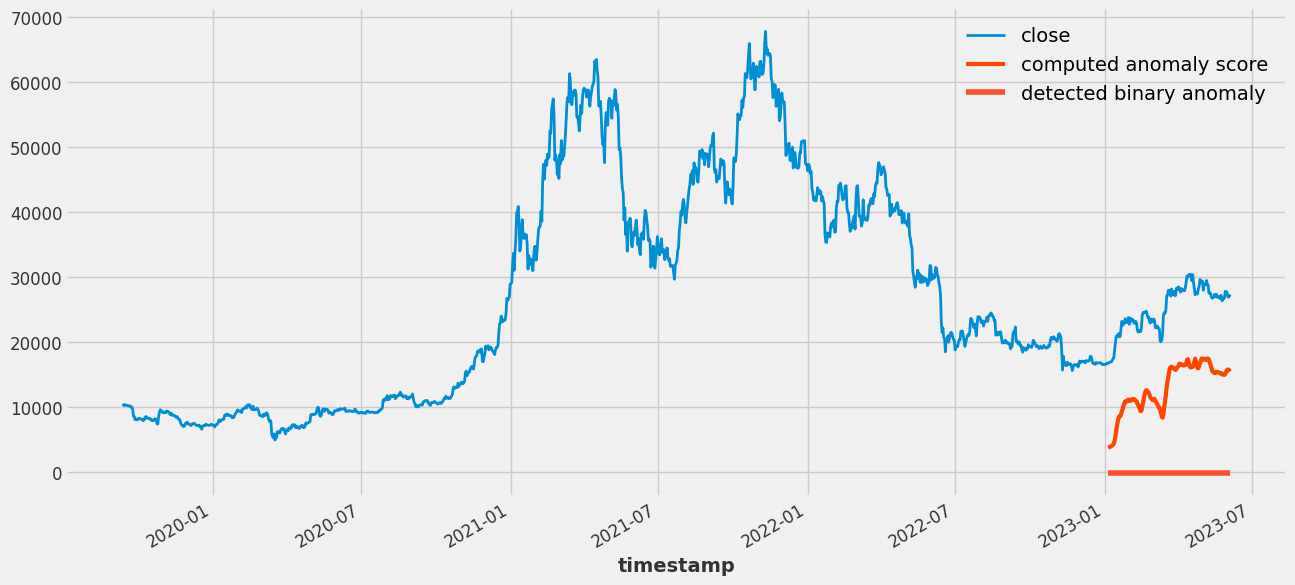

In [44]:
import matplotlib.pyplot as plt

series.plot()
(anom_score / 2. - 100).plot(label="computed anomaly score", c="orangered", lw=3)
(binary_anom * 45 - 150).plot(label="detected binary anomaly", lw=4)

In [45]:
from darts.metrics import mape

In [46]:
score=mape(val_ets,prediction)

In [47]:
score

57.02717976581284

In [48]:
from darts.metrics import mase

In [49]:
score1=mase(val_ets,prediction,train_ets)

In [50]:
score1

21.059985034791286

In [51]:
model = ExponentialSmoothing()

backtest = model.historical_forecasts(series,start=0.8, forecast_horizon=1)

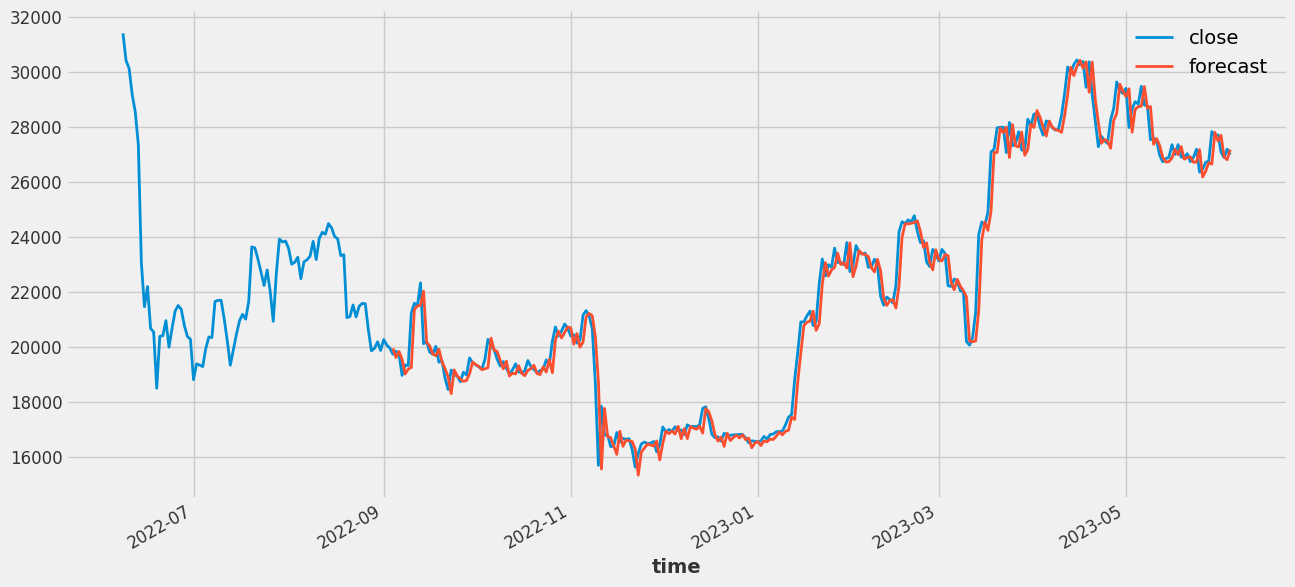

In [52]:
series[1000:].plot()
backtest.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [53]:
backtest.time_index

DatetimeIndex(['2022-09-04', '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-10', '2022-09-11', '2022-09-12', '2022-09-13',
               ...
               '2023-05-26', '2023-05-27', '2023-05-28', '2023-05-29', '2023-05-30', '2023-05-31', '2023-06-01', '2023-06-02', '2023-06-03', '2023-06-04'], dtype='datetime64[ns]', name='time', length=274, freq='D')

In [54]:
data.head()

,timestamp,open,high,low,close,volume,volume_CMF,volume_FII,volume_MFI,volume_VWA,mom_AOI,mom_PPO,mom_PPO_signal,mom_PVO,mom_PVO_signal,mom_ROC,mom_rsi,mom_stoch_RSI,mom_StochOscillator,mom_StochOscillator_signal,mom_TSI,mom_UltimateOscillator,mom_WilliamsRIndicator,volat_ATR,volat_bol_hband_binary,volat_bol_lband_binary,volat_bol_band_width,KCW,KCP,donch_DCW,ULI,ADX,ADX_neg,ADX_pos,ARI_down,ARI,ARI_up,CCI,DPO,EMA_100_binary,KST,KST_diff,KST_sig,MACD_line,MACD_signal,MAI,PSAR_binary,STC,TRIX,vortex_ind_diff,vortex_neg,vortex_pos,S&P_close_filled,Interest_Rates_filled,Inflation_Rate_us,subhag_signal,Fisher,Fisher_trigger,supertrend,chop_index,Velocity,log_close
0,2019-09-12,10099.78,10184.66,10081.81,10161.51,621.690,0.008019,9381.841629,54.999476,10062.211552,-8.198794,-0.116362,-0.288550,16.431891,9.311687,1.452269,57.987654,1.000000,90.760327,83.238267,-5.246409,52.701871,-9.239673,80.236309,1.0,0.0,1.607514,1.558032,1.168745,2.489067,0.729341,13.991682,17.547411,26.026556,76.0,24.0,100.0,181.949135,37.5275,0,-9.504205,4.577703,-14.081908,-11.741233,-29.133452,25.679280,1,98.265595,-0.046155,0.183679,0.900498,1.084177,3009.57,2.25,1.7,1,1.05901,0.58994,1,55.107287,-1,9.226362
1,2019-09-13,10321.45,10400.00,10321.45,10388.87,655.809,0.095988,11734.867436,77.615349,10259.840800,159.304471,0.608617,0.468596,4.272041,5.684204,2.640083,70.369326,0.868380,96.554713,88.218528,28.186883,53.604233,-3.445287,67.796245,0.0,0.0,4.120070,1.230895,1.938013,2.230950,0.321799,27.225902,11.870076,32.964564,40.0,60.0,100.0,112.401856,-56.9245,1,19.737246,6.358419,13.378827,62.202615,47.771729,24.292162,1,99.984201,0.069384,0.575479,0.686524,1.262003,3007.39,2.25,1.7,-1,2.53919,2.24085,1,42.784133,1,9.248490
2,2019-09-14,10254.01,10299.66,10231.31,10287.11,681.268,0.033290,979.983540,41.709476,10275.093802,-76.575235,-0.047843,0.044734,2.761658,5.839311,-0.187456,51.924402,0.776736,70.134915,45.981215,-2.620863,58.261506,-29.865085,61.373709,0.0,0.0,1.566792,1.102287,0.477146,1.854662,0.945806,22.265541,20.256346,18.970713,92.0,-80.0,12.0,-37.651195,-17.6625,1,0.444923,-4.194756,4.639679,-4.915877,4.601034,24.405506,1,0.000381,0.007842,-0.039844,0.995906,0.956061,3007.39,2.25,1.7,1,-1.52562,-1.92668,1,56.123524,-1,9.238647
3,2019-09-15,10395.04,10419.97,10317.39,10377.71,1011.804,0.090962,4476.915550,46.417427,10338.125632,69.057147,0.244907,0.178765,3.620128,4.110448,0.700987,60.161971,0.765572,78.569980,85.801171,18.337634,61.533868,-21.430020,52.754102,0.0,0.0,1.552809,0.903583,1.091146,1.904409,0.272558,17.831905,18.380853,21.759678,64.0,32.0,96.0,98.433260,-17.6275,1,5.356089,3.119255,2.236834,25.294393,18.444913,24.432979,1,99.857559,0.023631,0.171927,0.875705,1.047632,3007.39,2.25,1.7,-1,2.34801,2.39448,1,49.875268,1,9.247416
4,2019-09-16,10271.19,10304.56,10266.13,10289.03,834.126,0.021198,-752.692873,34.979972,10292.117754,-19.298147,-0.082579,-0.067507,0.362793,1.060619,0.033737,46.724133,0.654263,45.748786,39.910370,-7.941591,50.045302,-54.251214,43.731726,0.0,0.0,0.578982,0.689130,0.380905,0.780561,0.519789,39.609535,26.743730,11.020501,96.0,-92.0,4.0,-74.176329,11.9175,1,-3.065092,-0.524449,-2.540643,-8.507406,-6.956787,24.071955,1,0.000021,-0.010739,-0.071409,1.018981,0.947572,2997.96,2.25,1.7,-1,0.00179,0.18466,1,70.808813,-1,9.238834


In [55]:
data.reset_index(inplace=True)

In [56]:
real = data[data['timestamp']>='2022-09-04'][['timestamp','close']]
#data['timestamp']>='2022-09-04'

In [57]:
real

,timestamp,close
1088,2022-09-04,19739.7
1089,2022-09-05,19848.7
1090,2022-09-06,19743.3
1091,2022-09-07,18968.5
1092,2022-09-08,19350.5
...,...,...
1357,2023-05-31,27710.1
1358,2023-06-01,27081.9
1359,2023-06-02,26881.4
1360,2023-06-03,27190.0


In [58]:
real_series = TimeSeries.from_dataframe(real, 'timestamp', "close",freq='1D')

In [59]:
real_series

<TimeSeries (DataArray) (timestamp: 274, component: 1, sample: 1)>
array([[[19739.7]],

       [[19848.7]],

       [[19743.3]],

       [[18968.5]],

       [[19350.5]],

       [[19322.1]],

       [[21241.7]],

       [[21594. ]],

       [[21502.7]],

       [[22330.7]],

...

       [[26465.9]],

       [[26711.4]],

       [[26759.4]],

       [[27828.5]],

       [[27653.4]],

       [[27710.1]],

       [[27081.9]],

       [[26881.4]],

       [[27190. ]],

       [[26990. ]]])
Coordinates:
  * timestamp  (timestamp) datetime64[ns] 2022-09-04 2022-09-05 ... 2023-06-04
  * component  (component) object 'close'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [60]:
score=mape(real_series,backtest)

In [61]:
score

1.8420896089129328

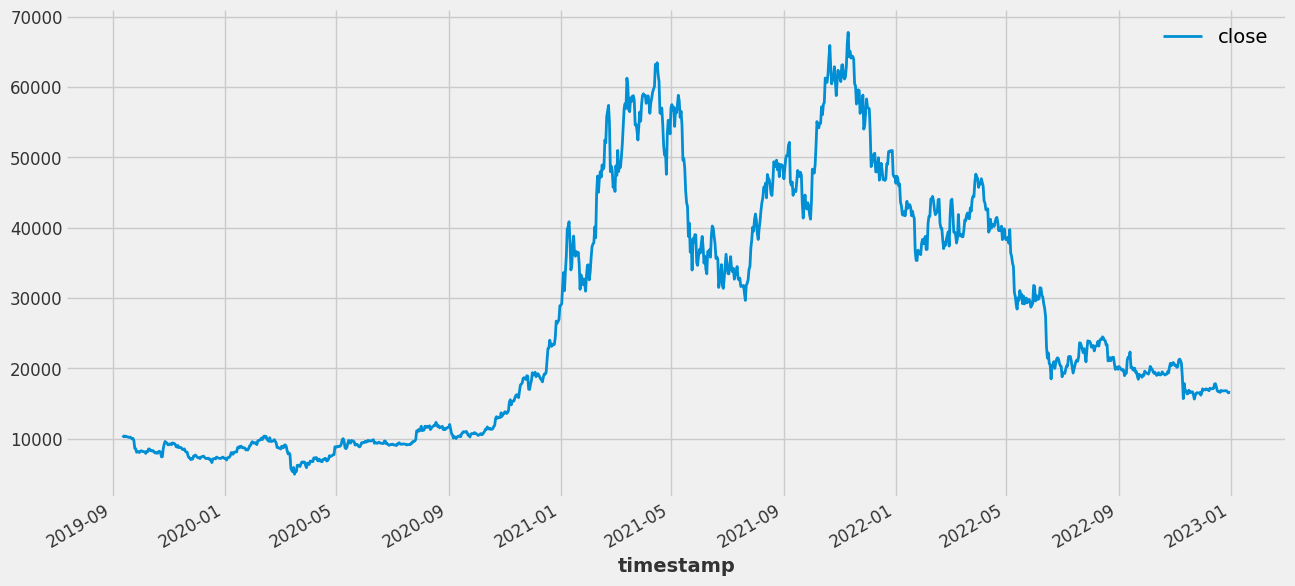

In [62]:
train_ets.plot()

In [63]:
backtest

<TimeSeries (DataArray) (time: 274, component: 1, sample: 1)>
array([[[19952.04970242]],

       [[19617.37530737]],

       [[19838.99365316]],

       [[19547.45226827]],

       [[19019.26761507]],

       [[19198.56533392]],

       [[19255.14275552]],

       [[21365.04144074]],

       [[21489.62170029]],

       [[21520.98674485]],

...

       [[26180.24385222]],

       [[26389.58931604]],

       [[26700.28118444]],

       [[26645.58945834]],

       [[27800.74155642]],

       [[27485.96410827]],

       [[27692.29808536]],

       [[26907.80295149]],

       [[26806.83987929]],

       [[27178.02369327]]])
Coordinates:
  * time       (time) datetime64[ns] 2022-09-04 2022-09-05 ... 2023-06-04
  * component  (component) object 'close'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [64]:
forecast1 = model_ESP.predict(1)

In [65]:
print("model {} obtains MAPE: {:.2f}%".format(model_ESP, mape(val_ets[0], forecast1)))

model ExponentialSmoothing() obtains MAPE: 0.14%


Choosing the model for forecasting

Gridsearch best model.best params

# ARIMA

In [66]:
from statsmodels.tsa.arima.model import ARIMA

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [68]:
#data.set_index('timestamp',inplace=True)

In [69]:
data

,index,timestamp,open,high,low,close,volume,volume_CMF,volume_FII,volume_MFI,volume_VWA,mom_AOI,mom_PPO,mom_PPO_signal,mom_PVO,mom_PVO_signal,mom_ROC,mom_rsi,mom_stoch_RSI,mom_StochOscillator,mom_StochOscillator_signal,mom_TSI,mom_UltimateOscillator,mom_WilliamsRIndicator,volat_ATR,volat_bol_hband_binary,volat_bol_lband_binary,volat_bol_band_width,KCW,KCP,donch_DCW,ULI,ADX,ADX_neg,ADX_pos,ARI_down,ARI,ARI_up,CCI,DPO,EMA_100_binary,KST,KST_diff,KST_sig,MACD_line,MACD_signal,MAI,PSAR_binary,STC,TRIX,vortex_ind_diff,vortex_neg,vortex_pos,S&P_close_filled,Interest_Rates_filled,Inflation_Rate_us,subhag_signal,Fisher,Fisher_trigger,supertrend,chop_index,Velocity,log_close
0,0,2019-09-12,10099.78,10184.66,10081.81,10161.51,621.690,0.008019,9381.841629,54.999476,10062.211552,-8.198794,-0.116362,-0.288550,16.431891,9.311687,1.452269,57.987654,1.000000,90.760327,83.238267,-5.246409,52.701871,-9.239673,80.236309,1.0,0.0,1.607514,1.558032,1.168745,2.489067,0.729341,13.991682,17.547411,26.026556,76.0,24.0,100.0,181.949135,37.5275,0,-9.504205,4.577703,-14.081908,-11.741233,-29.133452,25.679280,1,98.265595,-0.046155,0.183679,0.900498,1.084177,3009.57,2.25,1.70,1,1.05901,0.58994,1,55.107287,-1,9.226362
1,1,2019-09-13,10321.45,10400.00,10321.45,10388.87,655.809,0.095988,11734.867436,77.615349,10259.840800,159.304471,0.608617,0.468596,4.272041,5.684204,2.640083,70.369326,0.868380,96.554713,88.218528,28.186883,53.604233,-3.445287,67.796245,0.0,0.0,4.120070,1.230895,1.938013,2.230950,0.321799,27.225902,11.870076,32.964564,40.0,60.0,100.0,112.401856,-56.9245,1,19.737246,6.358419,13.378827,62.202615,47.771729,24.292162,1,99.984201,0.069384,0.575479,0.686524,1.262003,3007.39,2.25,1.70,-1,2.53919,2.24085,1,42.784133,1,9.248490
2,2,2019-09-14,10254.01,10299.66,10231.31,10287.11,681.268,0.033290,979.983540,41.709476,10275.093802,-76.575235,-0.047843,0.044734,2.761658,5.839311,-0.187456,51.924402,0.776736,70.134915,45.981215,-2.620863,58.261506,-29.865085,61.373709,0.0,0.0,1.566792,1.102287,0.477146,1.854662,0.945806,22.265541,20.256346,18.970713,92.0,-80.0,12.0,-37.651195,-17.6625,1,0.444923,-4.194756,4.639679,-4.915877,4.601034,24.405506,1,0.000381,0.007842,-0.039844,0.995906,0.956061,3007.39,2.25,1.70,1,-1.52562,-1.92668,1,56.123524,-1,9.238647
3,3,2019-09-15,10395.04,10419.97,10317.39,10377.71,1011.804,0.090962,4476.915550,46.417427,10338.125632,69.057147,0.244907,0.178765,3.620128,4.110448,0.700987,60.161971,0.765572,78.569980,85.801171,18.337634,61.533868,-21.430020,52.754102,0.0,0.0,1.552809,0.903583,1.091146,1.904409,0.272558,17.831905,18.380853,21.759678,64.0,32.0,96.0,98.433260,-17.6275,1,5.356089,3.119255,2.236834,25.294393,18.444913,24.432979,1,99.857559,0.023631,0.171927,0.875705,1.047632,3007.39,2.25,1.70,-1,2.34801,2.39448,1,49.875268,1,9.247416
4,4,2019-09-16,10271.19,10304.56,10266.13,10289.03,834.126,0.021198,-752.692873,34.979972,10292.117754,-19.298147,-0.082579,-0.067507,0.362793,1.060619,0.033737,46.724133,0.654263,45.748786,39.910370,-7.941591,50.045302,-54.251214,43.731726,0.0,0.0,0.578982,0.689130,0.380905,0.780561,0.519789,39.609535,26.743730,11.020501,96.0,-92.0,4.0,-74.176329,11.9175,1,-3.065092,-0.524449,-2.540643,-8.507406,-6.956787,24.071955,1,0.000021,-0.010739,-0.071409,1.018981,0.947572,2997.96,2.25,1.70,-1,0.00179,0.18466,1,70.808813,-1,9.238834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,1357,2023-05-31,27745.70,27832.70,27637.40,27710.10,10281.328,-0.115085,-255844.295704,37.428422,27785.137663,-4.049412,0.001926,0.034655,-5.320770,1.433885,-0.466595,47.666722,0.236410,35.410932,46.021759,0.078157,52.449216,-64.589068,154.142202,0.0,0.0,1.255117,1.083264,0.274102,1.748186,0.845608,12.254840,20.165743,15.941349,72.0,-12.0,60.0,-53.584863,113.2100,1,-1.624776,-0.828185,-0.796592,0.534585,9.619334,25.037448

In [70]:
type(data.index)

pandas.core.indexes.range.RangeIndex

Multiplicative Decomposition 

In [71]:
#indexed_data=data[:1000]

In [72]:
#indexed_data

In [73]:
result_mul = seasonal_decompose(data['close'], model='multiplicative',period=5)

In [74]:
#Removing seasons
data['deseasonalized'] = data.close.values/result_mul.seasonal

In [75]:
#plt.figure(figsize=(15,4)); plt.subplot(1,2,1); plt.plot(data.deseasonalized);
#plt.title('close price lin', fontsize=16);

In [76]:
#Removing trend
data['linearized'] = np.log(data['deseasonalized'])

In [77]:
#plt.subplot(1,2,2); plt.plot(data['linearized'])
#plt.title('close price lin', fontsize=16);

In [78]:
# 1st Differencing
y_diff = data['linearized'].diff().dropna()

# 2nd Differencing
y_diff_diff = data['linearized'].diff().diff().dropna()

In [79]:
print('p-value zero-diff: ', adfuller(data['linearized'])[1])
print('p-value first-diff: ', adfuller(data['linearized'].diff().dropna())[1])
print('p-value second-diff: ', adfuller(data['linearized'].diff().diff().dropna())[1])

p-value zero-diff:  0.6244248802644607
p-value first-diff:  1.0638976843213856e-29
p-value second-diff:  1.0203666816273291e-23


In [80]:
from pmdarima.arima.utils import ndiffs
ndiffs(data['linearized'])

1

In [81]:
train_arima = data['linearized'][0:955]
val_arima = data['linearized'][955:]

In [82]:
arima = ARIMA(data['linearized'], order=(0, 1, 0), trend='t')
arima = arima.fit()

In [83]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             linearized   No. Observations:                 1362
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2605.368
Date:                Mon, 12 Jun 2023   AIC                          -5206.737
Time:                        15:08:27   BIC                          -5196.305
Sample:                             0   HQIC                         -5202.831
                               - 1362                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0007      0.001      0.722      0.470      -0.001       0.003
sigma2         0.0013   2.48e-05     51.231      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              2108.77
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                            -0.54
Prob(H) (two-sided):                  0.05   Kurtosis:                         9.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

parameters

In [84]:
aarima_model = AutoARIMA(
    start_p=1, start_q=1,
    max_p=5, max_q=5,
    m=1,
    d=1,
    seasonal=False,
    start_P=0,
    D=None,
    trace=True,
    error_action='ignore',
    suppress_warnings=True, stepwise=True
)

aarima_model.fit(train_ets)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20511.333, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20507.337, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20509.332, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20509.338, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20505.361, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.468 seconds


AutoARIMA(add_encoders=None, start_p=1, start_q=1, max_p=5, max_q=5, m=1, d=1, seasonal=False, start_P=0, D=None, trace=True, error_action=ignore, suppress_warnings=True, stepwise=True)

In [85]:
aarima_model.model_params

OrderedDict([('add_encoders', None),
             ('start_p', 1),
             ('start_q', 1),
             ('max_p', 5),
             ('max_q', 5),
             ('m', 1),
             ('d', 1),
             ('seasonal', False),
             ('start_P', 0),
             ('D', None),
             ('trace', True),
             ('error_action', 'ignore'),
             ('suppress_warnings', True),
             ('stepwise', True)])

In [86]:
data['linearized']

0        9.226619
1        9.246835
2        9.236515
3        9.250825
4        9.238965
          ...    
1357    10.227421
1358    10.210030
1359    10.199321
1360    10.210861
1361    10.201566
Name: linearized, Length: 1362, dtype: float64

In [87]:
#prediction = aarima_model.predict(len(val))

In [88]:
forecast_1 = aarima_model.predict(1)

In [89]:
val_ets

<TimeSeries (DataArray) (timestamp: 155, component: 1, sample: 1)>
array([[[16544. ]],

       [[16597.6]],

       [[16751.9]],

       [[16658.8]],

       [[16819.4]],

       [[16840. ]],

       [[16922.9]],

       [[16931.5]],

       [[16949.2]],

       [[17172.5]],

...

       [[26465.9]],

       [[26711.4]],

       [[26759.4]],

       [[27828.5]],

       [[27653.4]],

       [[27710.1]],

       [[27081.9]],

       [[26881.4]],

       [[27190. ]],

       [[26990. ]]])
Coordinates:
  * timestamp  (timestamp) datetime64[ns] 2023-01-01 2023-01-02 ... 2023-06-04
  * component  (component) object 'close'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [114]:
forecast_1

<TimeSeries (DataArray) (timestamp: 1, component: 1, sample: 1)>
array([[[16578.9]]])
Coordinates:
  * timestamp  (timestamp) datetime64[ns] 2023-01-01
  * component  (component) object 'close'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [90]:
print("model {} obtains MAPE: {:.2f}%".format(aarima_model, mape(val_ets[0], forecast_1)))

model AutoARIMA(start_p=1, start_q=1, max_p=5, max_q=5, m=1, d=1, seasonal=False, start_P=0, trace=True, error_action=ignore, suppress_warnings=True, stepwise=True) obtains MAPE: 0.21%


In [91]:
backtest1 = aarima_model.historical_forecasts(series,start=0.8, forecast_horizon=1)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18576.159, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18572.198, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18574.177, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18574.183, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18570.256, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.589 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18592.275, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18588.315, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18590.293, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18590.299, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18586.370, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.002 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18608

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18872.907, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18868.926, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18870.915, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18870.921, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18866.972, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.859 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18889.093, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18885.116, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18887.103, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18887.109, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18883.157, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.404 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18905.489, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0]

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19161.573, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19157.628, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.667 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19179.634, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19175.650, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19177.640, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19177.646, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19173.702, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.461 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19195.723, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19191.745, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19193.734, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19193.740, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19469.690, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19465.712, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19467.701, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19467.707, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19463.775, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.634 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19485.754, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19481.775, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19483.764, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19483.770, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19479.840, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.613 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19501.837, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19768.175, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19770.170, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19770.176, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19766.198, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.482 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19788.374, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19784.379, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19786.374, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19786.380, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19782.406, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.439 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19804.501, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19800.505, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20060.101, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20056.128, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.447 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20078.123, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20074.127, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20076.122, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20076.128, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20072.154, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.431 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20094.162, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20090.166, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20092.161, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20092.167, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20363.254, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20365.249, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20365.255, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20361.280, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.440 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20383.259, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20379.262, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20381.257, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20381.263, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20377.289, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.429 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20399.267, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20395.270, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20653.361, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20649.388, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.457 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20671.384, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20667.388, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20669.382, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20669.388, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20665.417, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.440 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20687.430, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20683.434, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20685.429, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20685.434, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20965.008, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20961.035, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20963.020, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20963.025, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20959.133, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.481 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20980.997, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20977.024, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20979.009, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20979.014, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20975.121, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.436 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20997.431, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21253.977, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21250.068, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.612 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21274.659, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21270.692, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21272.674, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21272.679, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21268.806, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.444 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21290.721, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21286.759, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21288.737, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21288.743, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21564.598, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21560.641, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21562.619, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21562.624, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21558.729, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.671 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21580.563, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21576.606, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21578.584, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21578.589, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21574.693, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.667 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21596.619, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0]

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21864.666, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21860.905, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.109 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21883.153, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21879.223, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21881.175, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21881.179, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21877.392, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.954 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21899.114, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21895.183, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21897.135, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21897.140, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22173.567, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22169.644, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22171.591, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22171.595, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22167.873, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.757 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22189.564, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22185.638, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22187.588, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22187.592, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22183.862, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.737 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22205.585, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0]

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22464.052, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22460.304, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.529 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22482.082, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22478.055, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22480.005, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22480.010, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22476.266, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.506 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22499.578, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22495.551, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22497.503, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22497.508, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22773.413, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22769.391, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22771.356, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22771.360, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22767.550, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.709 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22789.339, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22785.316, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22787.281, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22787.286, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22783.475, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.580 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22805.274, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]

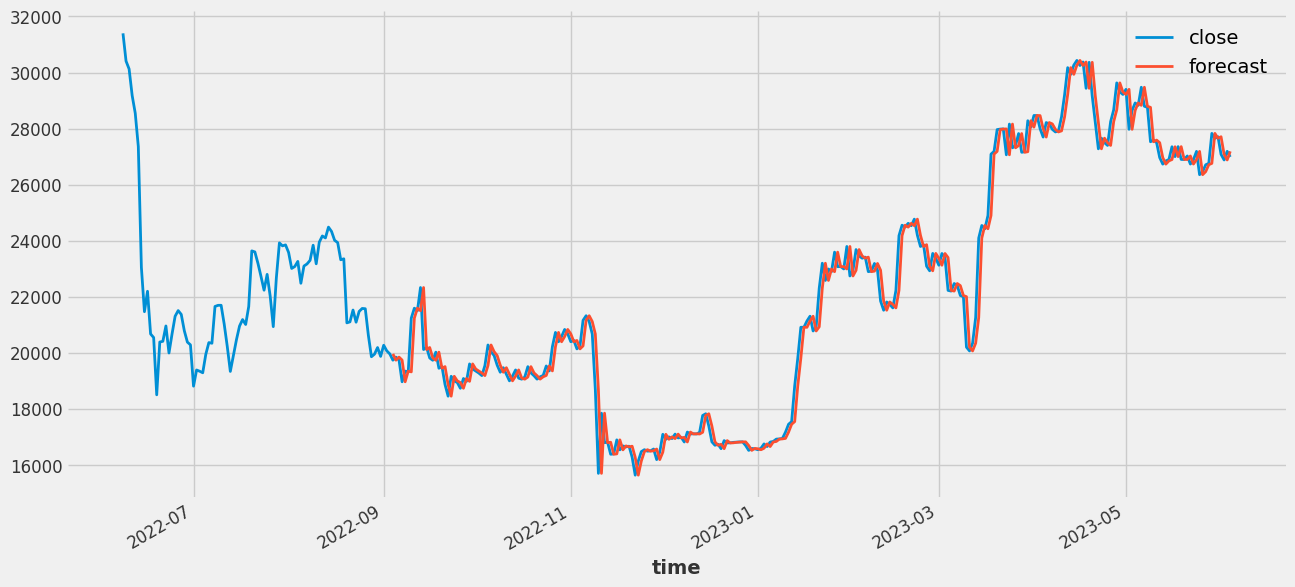

In [92]:
series[1000:].plot()
backtest1.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [93]:
backtest1.time_index

DatetimeIndex(['2022-09-04', '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-10', '2022-09-11', '2022-09-12', '2022-09-13',
               ...
               '2023-05-26', '2023-05-27', '2023-05-28', '2023-05-29', '2023-05-30', '2023-05-31', '2023-06-01', '2023-06-02', '2023-06-03', '2023-06-04'], dtype='datetime64[ns]', name='time', length=274, freq='D')

In [94]:
# Building model
arima = ARIMA(train_arima, order=(0, 1, 0), trend='t')  
arima = arima.fit()


forecast = arima.forecast(len(val_arima), alpha=0.05)  # 95% confidence


forecast_results = arima.get_forecast(len(val_arima), alpha=0.05)
forecast = forecast_results.predicted_mean
confidence_int = forecast_results.conf_int().values

In [95]:
#recomposition back to timeseries
forecast_recons = np.exp(forecast) * result_mul.seasonal[955:]
train_recons = np.exp(train_arima) * result_mul.seasonal[0:955]
val_recons = np.exp(val_arima) * result_mul.seasonal[955:]
lower_recons = np.exp(confidence_int)[:, 0] * result_mul.seasonal[955:]
upper_recons = np.exp(confidence_int)[:, 1] * result_mul.seasonal[955:]

In [96]:
lower_recons

955     36850.764220
956     35874.989755
957     35120.585995
958     34300.195888
959     33874.278892
            ...     
1357    16296.093903
1358    16199.684364
1359    16246.534411
1360    16238.191142
1361    16262.995339
Name: seasonal, Length: 407, dtype: float64

In [97]:
#residuals = pd.DataFrame(arima.resid)

In [98]:
backtest1

<TimeSeries (DataArray) (time: 274, component: 1, sample: 1)>
array([[[19962. ]],

       [[19739.7]],

       [[19848.7]],

       [[19743.3]],

       [[18968.5]],

       [[19350.5]],

       [[19322.1]],

       [[21241.7]],

       [[21594. ]],

       [[21502.7]],

...

       [[26356.2]],

       [[26465.9]],

       [[26711.4]],

       [[26759.4]],

       [[27828.5]],

       [[27653.4]],

       [[27710.1]],

       [[27081.9]],

       [[26881.4]],

       [[27190. ]]])
Coordinates:
  * time       (time) datetime64[ns] 2022-09-04 2022-09-05 ... 2023-06-04
  * component  (component) object 'close'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [99]:
score=mape(real_series,backtest1)

In [100]:
score

1.7559569902262187

# SARIMA

Train split

In [101]:
data['log'] = np.log(data.close)

In [191]:
train_ets

<TimeSeries (DataArray) (timestamp: 1207, component: 1, sample: 1)>
array([[[10161.51]],

       [[10388.87]],

       [[10287.11]],

       ...,

       [[16520.9 ]],

       [[16590.9 ]],

       [[16578.9 ]]])
Coordinates:
  * timestamp  (timestamp) datetime64[ns] 2019-09-12 2019-09-13 ... 2022-12-31
  * component  (component) object 'close'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [192]:
val_ets

<TimeSeries (DataArray) (timestamp: 155, component: 1, sample: 1)>
array([[[16544. ]],

       [[16597.6]],

       [[16751.9]],

       [[16658.8]],

       [[16819.4]],

       [[16840. ]],

       [[16922.9]],

       [[16931.5]],

       [[16949.2]],

       [[17172.5]],

...

       [[26465.9]],

       [[26711.4]],

       [[26759.4]],

       [[27828.5]],

       [[27653.4]],

       [[27710.1]],

       [[27081.9]],

       [[26881.4]],

       [[27190. ]],

       [[26990. ]]])
Coordinates:
  * timestamp  (timestamp) datetime64[ns] 2023-01-01 2023-01-02 ... 2023-06-04
  * component  (component) object 'close'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [193]:
fore_2_ts

<TimeSeries (DataArray) (time: 1, component: 1, sample: 1)>
array([[[10.58630123]]])
Coordinates:
  * time       (time) int64 955
  * component  (component) <U1 '0'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [241]:
aarima_model_2 = AutoARIMA(
    start_p=1, start_q=1,
    max_p=5, max_q=5,
    m=12,
    d=1,
    seasonal=False,
    start_P=0,
    D=None,
    trace=True,
    error_action='ignore',
    suppress_warnings=True, stepwise=True
)

aarima_model_2.fit(train_ets)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20511.333, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20507.337, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20509.332, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20509.338, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20505.361, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.599 seconds


AutoARIMA(add_encoders=None, start_p=1, start_q=1, max_p=5, max_q=5, m=12, d=1, seasonal=False, start_P=0, D=None, trace=True, error_action=ignore, suppress_warnings=True, stepwise=True)

In [240]:
aarima_model_2.model_params

OrderedDict([('add_encoders', None),
             ('start_p', 1),
             ('start_q', 1),
             ('max_p', 5),
             ('max_q', 5),
             ('m', 12),
             ('d', 1),
             ('seasonal', False),
             ('start_P', 0),
             ('D', None),
             ('trace', True),
             ('error_action', 'ignore'),
             ('suppress_warnings', True),
             ('stepwise', True)])

In [244]:
forecast_2 = aarima_model_2.predict(1)

In [245]:
print("model {} obtains MAPE: {:.2f}%".format(aarima_model_2, mape(val_ets[0], forecast_2)))

model AutoARIMA(start_p=1, start_q=1, max_p=5, max_q=5, m=12, d=1, seasonal=False, start_P=0, trace=True, error_action=ignore, suppress_warnings=True, stepwise=True) obtains MAPE: 0.21%


In [132]:
#forecast_recons = pd.Series(np.exp(forecast), index=val_arima.index)
#lower_recons = np.exp(confidence_int['lower log']).values
#upper_recons = np.exp(confidence_int['upper log']).values

In [195]:
#forecast_data= data[data['timestamp']>='2022-09-04'][['timestamp','close']]

In [196]:
#forecast_2_series = TimeSeries.from_dataframe(forecast_data, 'timestamp', "close",freq='1D')

In [246]:
#forecast_2_series

In [247]:
#forecast_2_series= pd.DataFrame(smodel.predict(1))

In [248]:
#np.array(forecast_2_series)

In [249]:
#fore_2_ts=TimeSeries.from_dataframe(forecast_2_series)

In [250]:
#fore_2_ts

In [128]:
# val.reset_index(drop=True,inplace = True)

# PROPHET

In [254]:
df = data.reset_index().rename(columns={'timestamp': 'ds', 'close':'y'})
df.head()

,index,ds,open,high,low,y,volume,volume_CMF,volume_FII,volume_MFI,volume_VWA,mom_AOI,mom_PPO,mom_PPO_signal,mom_PVO,mom_PVO_signal,mom_ROC,mom_rsi,mom_stoch_RSI,mom_StochOscillator,mom_StochOscillator_signal,mom_TSI,mom_UltimateOscillator,mom_WilliamsRIndicator,volat_ATR,volat_bol_hband_binary,volat_bol_lband_binary,volat_bol_band_width,KCW,KCP,donch_DCW,ULI,ADX,ADX_neg,ADX_pos,ARI_down,ARI,ARI_up,CCI,DPO,EMA_100_binary,KST,KST_diff,KST_sig,MACD_line,MACD_signal,MAI,PSAR_binary,STC,TRIX,vortex_ind_diff,vortex_neg,vortex_pos,S&P_close_filled,Interest_Rates_filled,Inflation_Rate_us,subhag_signal,Fisher,Fisher_trigger,supertrend,chop_index,Velocity
0,0,2019-09-12,10099.78,10184.66,10081.81,10161.51,621.690,0.008019,9381.841629,54.999476,10062.211552,-8.198794,-0.116362,-0.288550,16.431891,9.311687,1.452269,57.987654,1.000000,90.760327,83.238267,-5.246409,52.701871,-9.239673,80.236309,1.0,0.0,1.607514,1.558032,1.168745,2.489067,0.729341,13.991682,17.547411,26.026556,76.0,24.0,100.0,181.949135,37.5275,0,-9.504205,4.577703,-14.081908,-11.741233,-29.133452,25.679280,1,98.265595,-0.046155,0.183679,0.900498,1.084177,3009.57,2.25,1.7,1,1.05901,0.58994,1,55.107287,-1
1,1,2019-09-13,10321.45,10400.00,10321.45,10388.87,655.809,0.095988,11734.867436,77.615349,10259.840800,159.304471,0.608617,0.468596,4.272041,5.684204,2.640083,70.369326,0.868380,96.554713,88.218528,28.186883,53.604233,-3.445287,67.796245,0.0,0.0,4.120070,1.230895,1.938013,2.230950,0.321799,27.225902,11.870076,32.964564,40.0,60.0,100.0,112.401856,-56.9245,1,19.737246,6.358419,13.378827,62.202615,47.771729,24.292162,1,99.984201,0.069384,0.575479,0.686524,1.262003,3007.39,2.25,1.7,-1,2.53919,2.24085,1,42.784133,1
2,2,2019-09-14,10254.01,10299.66,10231.31,10287.11,681.268,0.033290,979.983540,41.709476,10275.093802,-76.575235,-0.047843,0.044734,2.761658,5.839311,-0.187456,51.924402,0.776736,70.134915,45.981215,-2.620863,58.261506,-29.865085,61.373709,0.0,0.0,1.566792,1.102287,0.477146,1.854662,0.945806,22.265541,20.256346,18.970713,92.0,-80.0,12.0,-37.651195,-17.6625,1,0.444923,-4.194756,4.639679,-4.915877,4.601034,24.405506,1,0.000381,0.007842,-0.039844,0.995906,0.956061,3007.39,2.25,1.7,1,-1.52562,-1.92668,1,56.123524,-1
3,3,2019-09-15,10395.04,10419.97,10317.39,10377.71,1011.804,0.090962,4476.915550,46.417427,10338.125632,69.057147,0.244907,0.178765,3.620128,4.110448,0.700987,60.161971,0.765572,78.569980,85.801171,18.337634,61.533868,-21.430020,52.754102,0.0,0.0,1.552809,0.903583,1.091146,1.904409,0.272558,17.831905,18.380853,21.759678,64.0,32.0,96.0,98.433260,-17.6275,1,5.356089,3.119255,2.236834,25.294393,18.444913,24.432979,1,99.857559,0.023631,0.171927,0.875705,1.047632,3007.39,2.25,1.7,-1,2.34801,2.39448,1,49.875268,1
4,4,2019-09-16,10271.19,10304.56,10266.13,10289.03,834.126,0.021198,-752.692873,34.979972,10292.117754,-19.298147,-0.082579,-0.067507,0.362793,1.060619,0.033737,46.724133,0.654263,45.748786,39.910370,-7.941591,50.045302,-54.251214,43.731726,0.0,0.0,0.578982,0.689130,0.380905,0.780561,0.519789,39.609535,26.743730,11.020501,96.0,-92.0,4.0,-74.176329,11.9175,1,-3.065092,-0.524449,-2.540643,-8.507406,-6.956787,24.071955,1,0.000021,-0.010739,-0.071409,1.018981,0.947572,2997.96,2.25,1.7,-1,0.00179,0.18466,1,70.808813,-1


In [256]:
from prophet import Prophet

train_fb = df.iloc[:955]
val_fb = df.iloc[955:]

model_fb = Prophet(seasonality_mode='multiplicative')

model_fb.fit(train_fb)

17:06:02 - cmdstanpy - INFO - Chain [1] start processing
17:06:02 - cmdstanpy - INFO - Chain [1] done processing


In [257]:
forecast_val = model_fb.predict(val_fb)
forecast_val.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2022-04-24,36510.773435,37303.742955,42425.694422,36510.773435,36510.773435,0.089283,0.089283,0.089283,0.001227,0.001227,0.001227,0.088056,0.088056,0.088056,0.0,0.0,0.0,39770.547905
1,2022-04-25,36450.902794,36921.928878,42202.042432,36450.902794,36450.902794,0.086207,0.086207,0.086207,-0.002513,-0.002513,-0.002513,0.088720,0.088720,0.088720,0.0,0.0,0.0,39593.219964
2,2022-04-26,36391.032153,36800.569203,42261.495549,36391.032153,36391.032153,0.088597,0.088597,0.088597,-0.000800,-0.000800,-0.000800,0.089397,0.089397,0.089397,0.0,0.0,0.0,39615.152503
3,2022-04-27,36331.161512,37049.744554,42227.196967,36331.161512,36331.161512,0.089716,0.089716,0.089716,-0.000229,-0.000229,-0.000229,0.089945,0.089945,0.089945,0.0,0.0,0.0,39590.655979
4,2022-04-28,36271.290871,37170.735720,42514.739028,36271.290871,36271.290871,0.096327,0.096327,0.096327,0.006109,0.006109,0.006109,0.090218,0.090218,0.090218,0.0,0.0,0.0,39765.188569


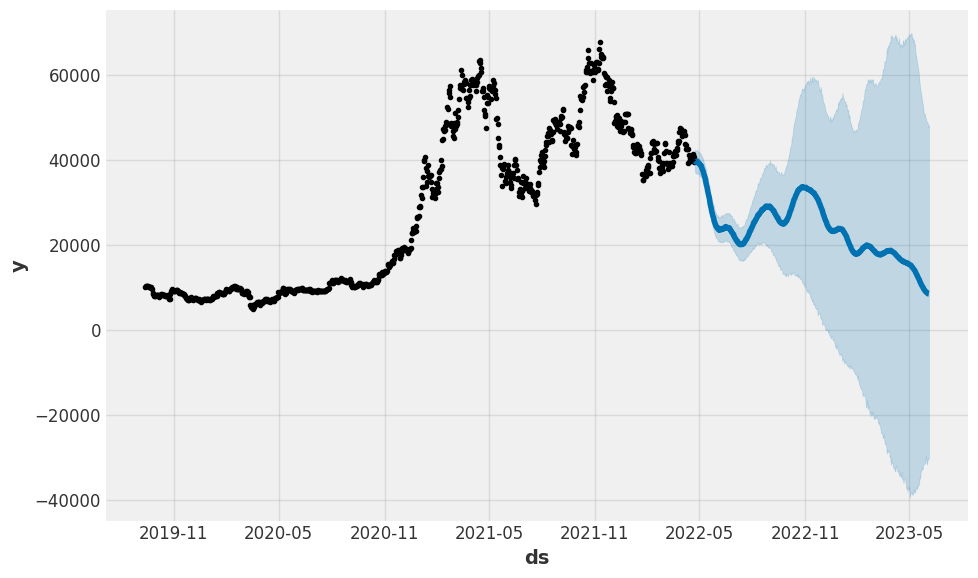

In [258]:
model_fb.plot(forecast_val);

In [259]:
# Predict the next 50 datapoints
future = model_fb.make_future_dataframe(periods=50, freq='1h')
forecast_future = model_fb.predict(future)
forecast_future.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2019-09-12,8537.665545,5846.774060,10760.054722,8537.665545,8537.665545,-0.031389,-0.031389,-0.031389,0.006109,0.006109,0.006109,-0.037497,-0.037497,-0.037497,0.0,0.0,0.0,8269.680435
1,2019-09-13,8510.103503,5638.042389,10740.001869,8510.103503,8510.103503,-0.045440,-0.045440,-0.045440,-0.001105,-0.001105,-0.001105,-0.044335,-0.044335,-0.044335,0.0,0.0,0.0,8123.403631
2,2019-09-14,8482.541461,5455.899757,10676.977144,8482.541461,8482.541461,-0.053821,-0.053821,-0.053821,-0.002689,-0.002689,-0.002689,-0.051132,-0.051132,-0.051132,0.0,0.0,0.0,8025.998756
3,2019-09-15,8454.979418,5275.088498,10763.640850,8454.979418,8454.979418,-0.056519,-0.056519,-0.056519,0.001227,0.001227,0.001227,-0.057746,-0.057746,-0.057746,0.0,0.0,0.0,7977.111112
4,2019-09-16,8427.417376,5182.659484,10689.516469,8427.417376,8427.417376,-0.066542,-0.066542,-0.066542,-0.002513,-0.002513,-0.002513,-0.064029,-0.064029,-0.064029,0.0,0.0,0.0,7866.641763


In [260]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

initial = f'{5 * 365} days' 
period = f'{5 * 365} days'
horizon = '365 days'
df_cv = cross_validation(model_fb, initial=initial, period=period, horizon=horizon)

ValueError: Less data than horizon after initial window. Make horizon or initial shorter.

In [263]:
forecast_3 = model_fb.predict(1)

AttributeError: 'int' object has no attribute 'shape'